In [9]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

# Determining training epochs

The below code is meant to help determine the right number of training epochs for each task and domain

In [10]:
domains = ["laptop","rest"]
model = ["pt"]
tasks = ["ae_spanbert-base-cased","asc_spanbert-base-cased"]
prefix = "run/"
runs = 5
file = "valid.json"
logfile = "train_log.txt"

In [11]:
data = []
for m in model:
    for t in tasks:
        for d in domains:
            for i in range(1,runs+1):
                path = prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+file
                losses = json.load(open(path, 'r'))["valid_losses"]
                log = open(prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+logfile).readlines()
                train_loss = [float(re.findall("(\d*\.\d+)",i)[0]) for i in log if i[0:14]=="training loss:"]
                for epoch in range(4):
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "valid",
                            "loss": losses[epoch]
                        }
                    )
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "train",
                            "loss": train_loss[epoch]
                        }
                    )

data = pd.DataFrame(data)
data

,model,task,domain,run,epoch,type,loss
0,pt,ae_spanbert-base-cased,laptop,1,1,valid,107.056570
1,pt,ae_spanbert-base-cased,laptop,1,1,train,38.720215
2,pt,ae_spanbert-base-cased,laptop,1,2,valid,115.502769
3,pt,ae_spanbert-base-cased,laptop,1,2,train,3.076172
4,pt,ae_spanbert-base-cased,laptop,1,3,valid,154.490136
...,...,...,...,...,...,...,...
155,pt,asc_spanbert-base-cased,rest,5,2,train,3.034592
156,pt,asc_spanbert-base-cased,rest,5,3,valid,2.340996
157,pt,asc_spanbert-base-cased,rest,5,3,train,1.446204
158,pt,asc_spanbert-base-cased,rest,5,4,valid,2.412616


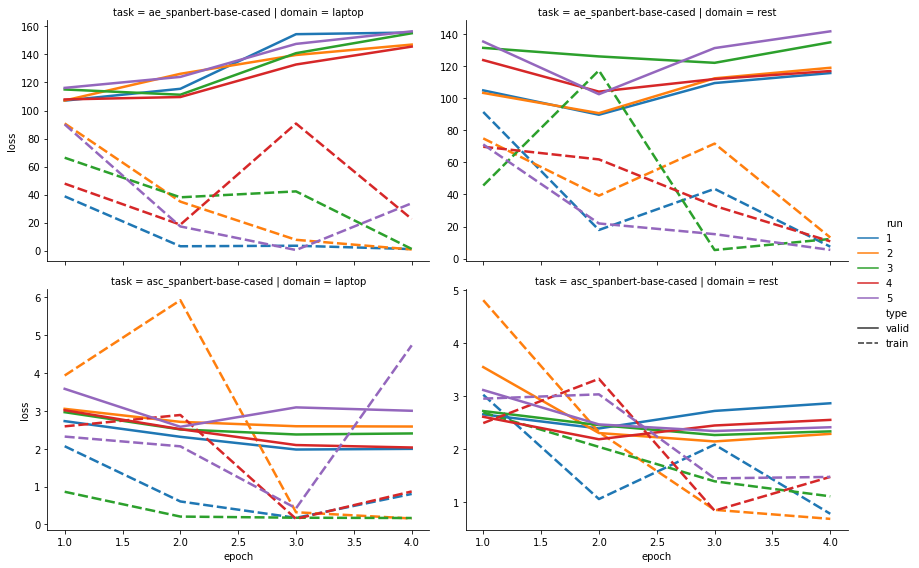

In [12]:
g = sns.FacetGrid(data, col="domain", row="task", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="epoch",
         y="loss",
         hue="run",
         palette="tab10", 
         style="type",
         linewidth=2.5)
g.add_legend()
g.savefig("validation_losses.png");

In [13]:
data.groupby(by=["model","task","domain","epoch","type"])[["loss"]]\
    .mean()\
    .reset_index()\
    .pivot(index=["model","task","domain","type"], columns=["epoch"])

loss              \
epoch                                                1           2   
model task                    domain type                            
pt    ae_spanbert-base-cased  laptop train   66.727692   22.352722   
                                     valid  110.653609  117.320432   
                              rest   train   70.516162   51.592175   
                                     valid  119.640948  102.523725   
      asc_spanbert-base-cased laptop train    2.357099    2.340726   
                                     valid    3.071878    2.528206   
                              rest   train    3.195499    2.355750   
                                     valid    2.930023    2.359509   

                                                                    
epoch                                                3           4  
model task                    domain type                           
pt    ae_spanbert-base-cased  laptop train   28.894580   11.863776  
                                     valid  143.092457  152.003497  
                              rest   train   33.705023    9.801221  
                                     valid  117.335851  125.534314  
      asc_spanbert-base-cased laptop train    0.250594    1.348660  
                                     valid    2.429854    2.406349  
                              rest   train    1.321169    1.101835  
                                     valid    2.383348    2.490366

In [ ]:
len("training loss:")